<img src="https://gems.agroinformatics.org/webui/static/img/gems-logo-secondary.png" alt="GEMS Logo" title="GEMS" />

# **Introduction to Spatial Data Analysis in R**

**Instructors:**  
Ali Joglekar (joglekar@umn.edu)  
Yuan Chai (chaix026@umn.edu)  

**Module Outline:**  
- [Get Spatial Data into R](#SF)  
  - [Exercise 1](#Ex1)
- [Creating Maps](#Maps) 
  - [Exercise 2](#Ex2)
- [Coordinate Reference Systems](#CRS)  
  - [Exercise 3](#Ex3)
- [Exploratory Analysis](#EDA)
  - [Exercise 4](#Ex4)

---

**Load R libraries**

In [14]:
# Install and load packages needed for this workshop

packages_to_load <- c("data.table", "sf", "terra", "ggplot2", "GGally", "repr")

for ( package in packages_to_load ) {
    # Check if package is already installed, if not, install and load the package
    if (!require(package, character.only=T, quietly=T)) {
        install.packages(package)
        library(package)
    }
}

# Set plot size
# options(repr.plot.width=16, repr.plot.height=8)


<details>
    
<summary><span style='color:Green'> Once packages are installed, it is recommended to just use library() to load your libraries  </span></summary>


```
# General dataframe libraries
library(data.table)

# Spatial data libraries
library(sf)
library(terra)

# Plotting libraries
library(ggplot2)
library(GGally)
```
----
          
</details>



<a id="SF"></a>
## **<span style='color:Blue'>Get Spatial Data into R</span>**
### Importing Shapefiles

In this example, we dowloaded the "DNR Division of Ecological and Water Resources District Boundaries" shapefile from Minnesota Geospatial Commons at https://gisdata.mn.gov/dataset/bdry-dnr-eco-and-water-res-admin and saved in our directory at `/data/MN DNR Districts`.  

Our first step is to read in the shapefiles to R

In [8]:
# Read-in our downloaded shapefiles
mn_sf <- st_read("./data/MN DNR Districts") #shapefiles called only using data source name (dsn)

Reading layer `dnr_ecological_and_water_resources_districts' from data source 
  `/home/u01000040/GEMS Learning/Spatial Data in R/Module 1 Introduction to spatial data analysis in R/data/MN DNR Districts' 
  using driver `ESRI Shapefile'
Simple feature collection with 8 features and 6 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: 189775.3 ymin: 4816305 xmax: 762254.5 ymax: 5472428
Projected CRS: NAD83 / UTM zone 15N


Quick Summary

In [9]:
summary(mn_sf)

  EWR_DISTRI           REGION            REGION_NUM    DIST_MANAG       
 Length:8           Length:8           Min.   :1.00   Length:8          
 Class :character   Class :character   1st Qu.:1.75   Class :character  
 Mode  :character   Mode  :character   Median :2.50   Mode  :character  
                                       Mean   :2.50                     
                                       3rd Qu.:3.25                     
                                       Max.   :4.00                     
   Shape_Leng        Shape_Area                 geometry
 Min.   : 771245   Min.   :1.821e+10   POLYGON      :8  
 1st Qu.: 919349   1st Qu.:2.278e+10   epsg:26915   :0  
 Median :1096468   Median :2.690e+10   +proj=utm ...:0  
 Mean   :1057769   Mean   :2.814e+10                    
 3rd Qu.:1157643   3rd Qu.:3.060e+10                    
 Max.   :1367550   Max.   :4.525e+10                    

<a id="Ex1"></a>
### **<span style='color:Green'> Exercise 1: Explore Malawi LSMS Wave 5 Data</span>**   

> *Data Source:*  
> Malawi Living Standard Measurement Survey Integrated Household Sample (LSMS-IHS) Data Wave 5 Data is available from https://microdata.worldbank.org/index.php/catalog/3818  
> The Shapefile can be downloaded from https://data.humdata.org/dataset/malawi-administrative-level-0-3-boundaries  

For today's workshop, data has been cleaned, transformed, and saved in your directory at `"/data/MWI"` 

**Read in the `mwi_shp_lsms` shapefile located in the `/data/MWI` folder**

<details>
    
<summary><span style='color:Green'> Click to see answer  </span></summary>

Use `st_read()` to read in the MWI shapefile:

```
mwi_sf <- st_read("./data/MWI")  #shapefiles called only using data source name (dsn)
```
----
          
</details>

**Explore the characteristics of your shapefile.** 
1. How many features does it have?
2. How many fields does it have?
3. Calculate the summary statistics of the field data.

<details>
    
<summary><span style='color:Green'> Click to see answer  </span></summary>

```
summary(mwi_sf)
```
----
          
</details>

---
<a id="Maps"></a>
## **<span style='color:Blue'>Creating Maps</span>**

### Simple base R plot, plot all variables by default

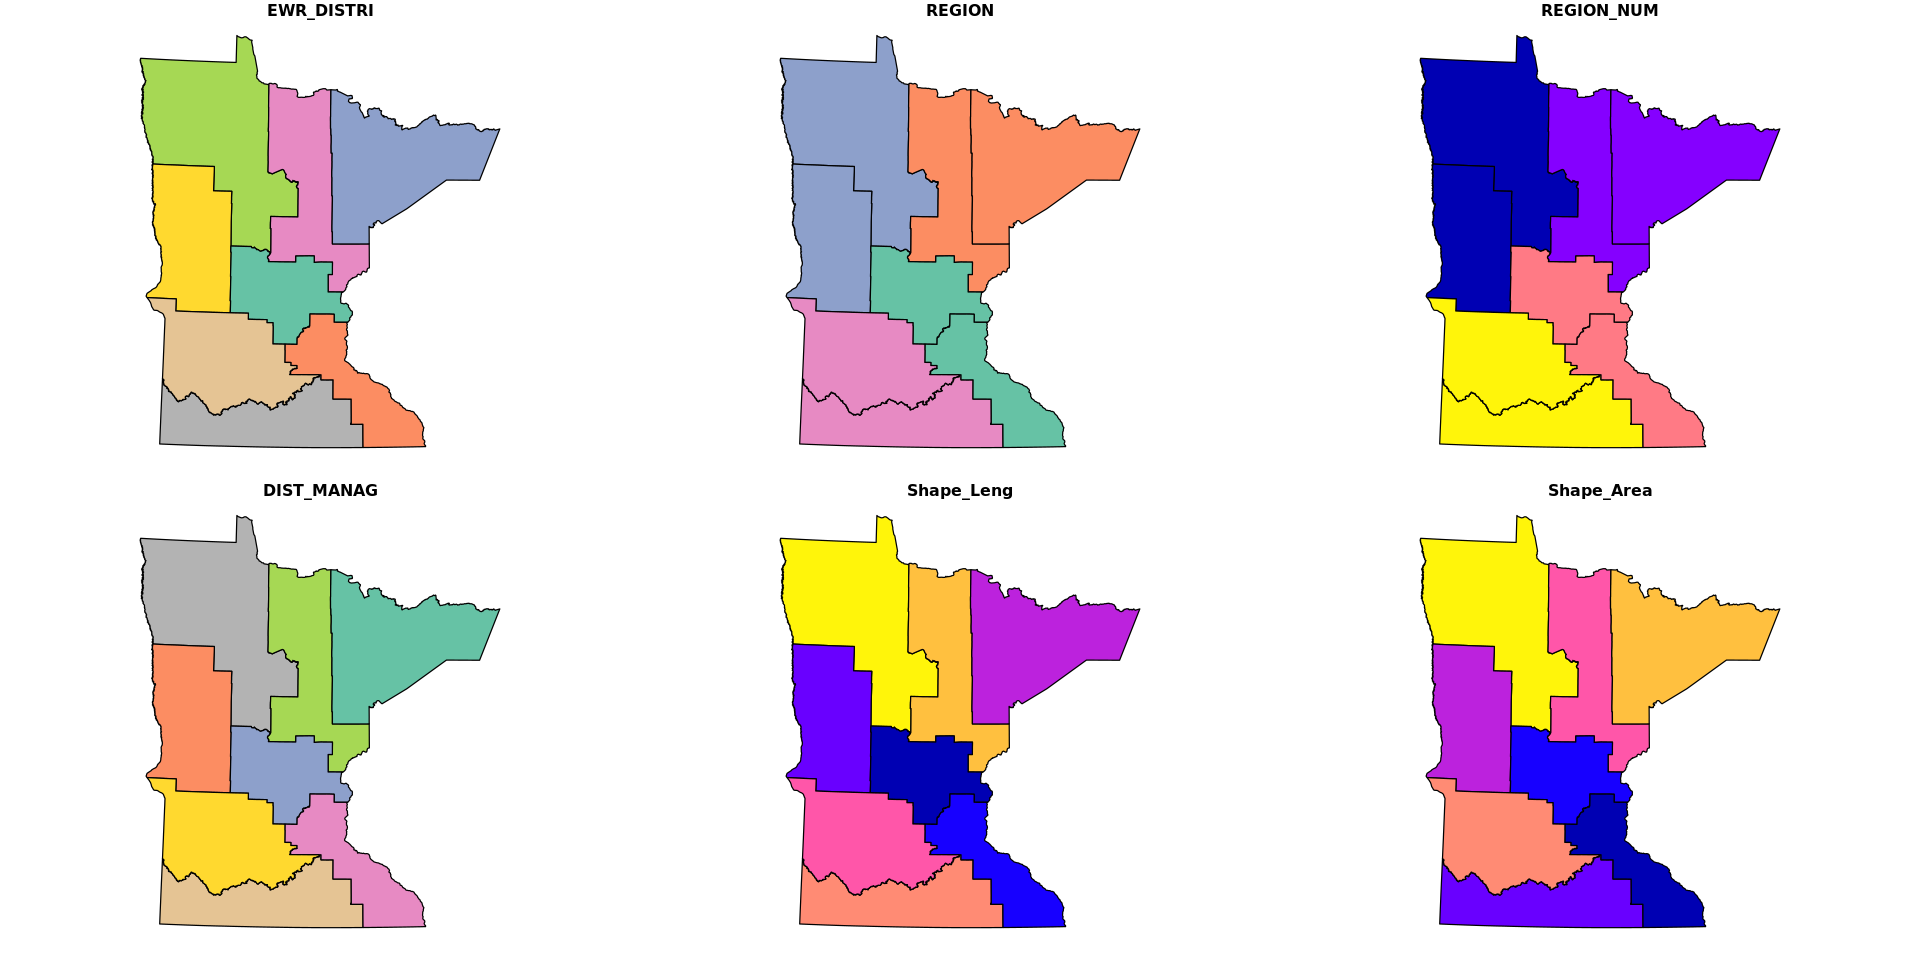

In [22]:
plot(mn_sf)

### Using `ggplot()` to plot geometry or selected variables

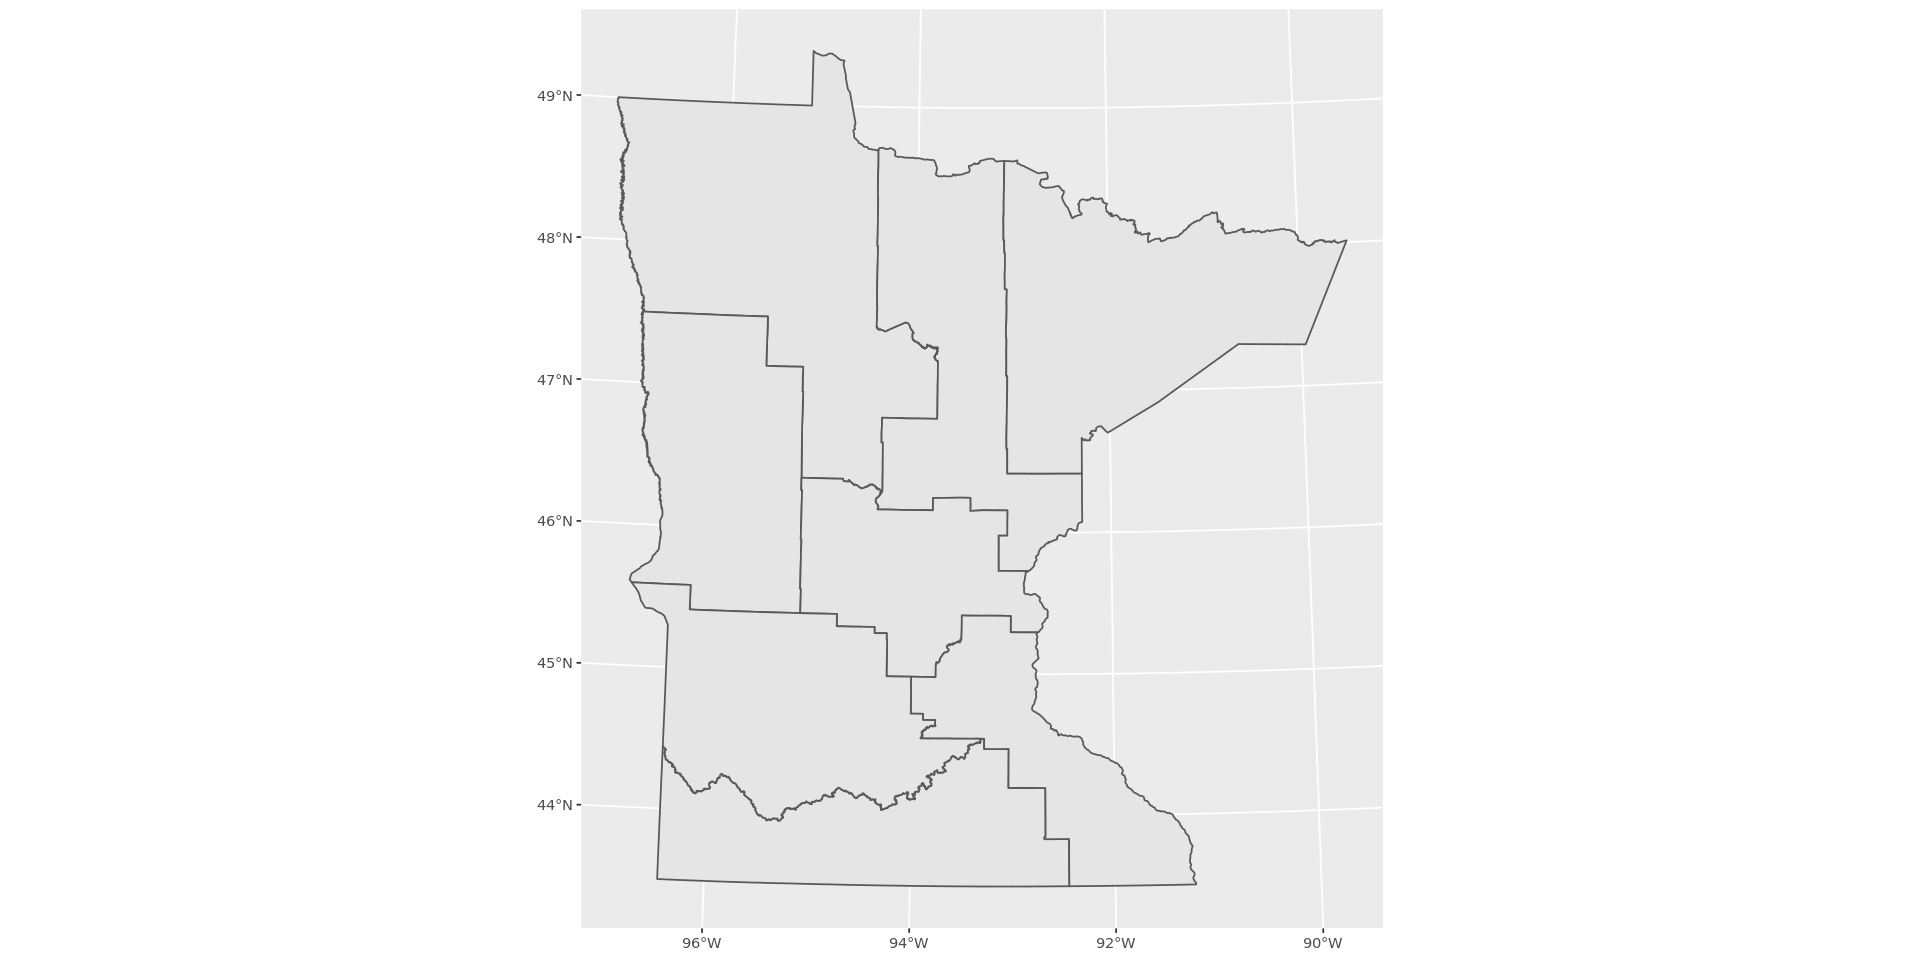

In [25]:
# Basic geometry
ggplot(mn_sf) +
    geom_sf()

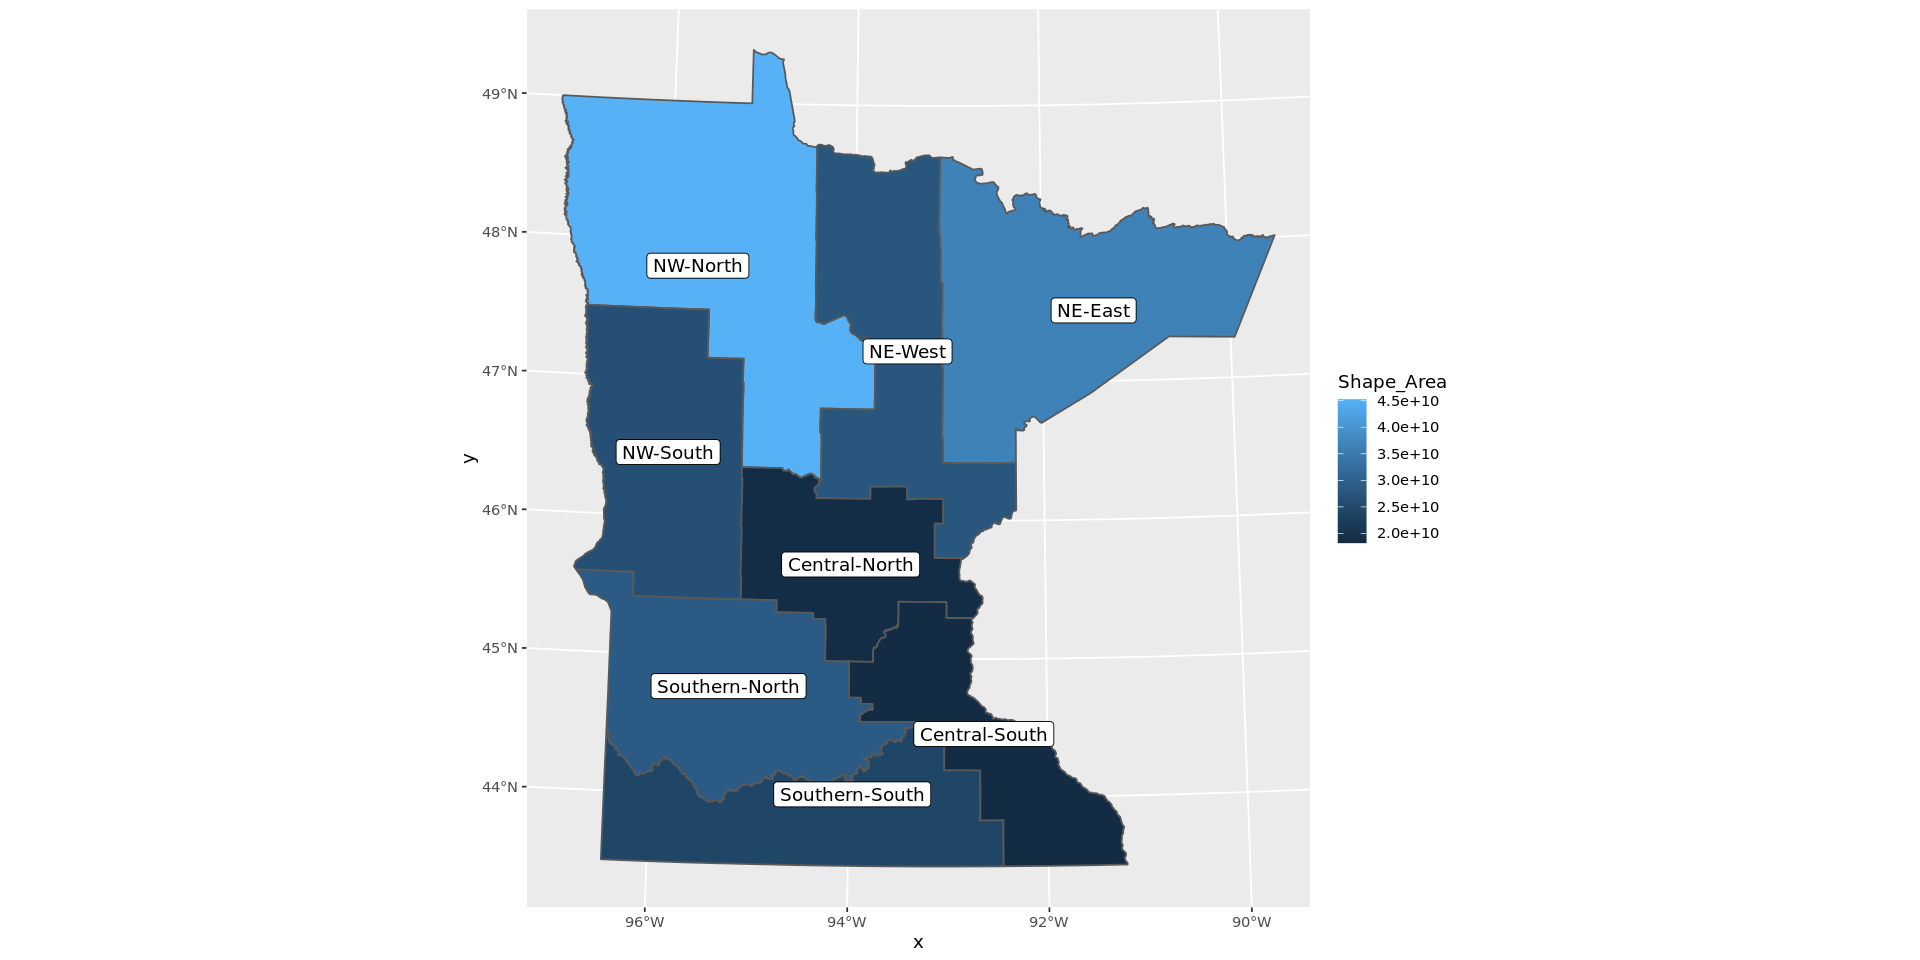

In [29]:
# Plot variable "EWR_DISTRI"
ggplot(mn_sf) +
    geom_sf(aes(fill=Shape_Area)) +
    geom_sf_label(aes(label=EWR_DISTRI))

<a id="Ex2"></a>
### **<span style='color:Green'> Exercise 2: Simple Maps</span>**   
Create some simple maps using the Malawi Living Standard Measurement Survey Integrated Household Sample (LSMS-IHS) Data Wave 5 Data

In [20]:
# plot all variables

# plot single varialbe "poverty"


<details>
    
<summary><span style='color:Green'> Click to see answer  </span></summary>


```
plot(mwi_sf, max.plot = 18)   #plots all variables
plot(mwi_sf["poverty"])       #plots single variable
```
----
          
</details>

---
<a id="CRS"></a>
## **<span style='color:Blue'>Coordinate Reference Systems</span>**


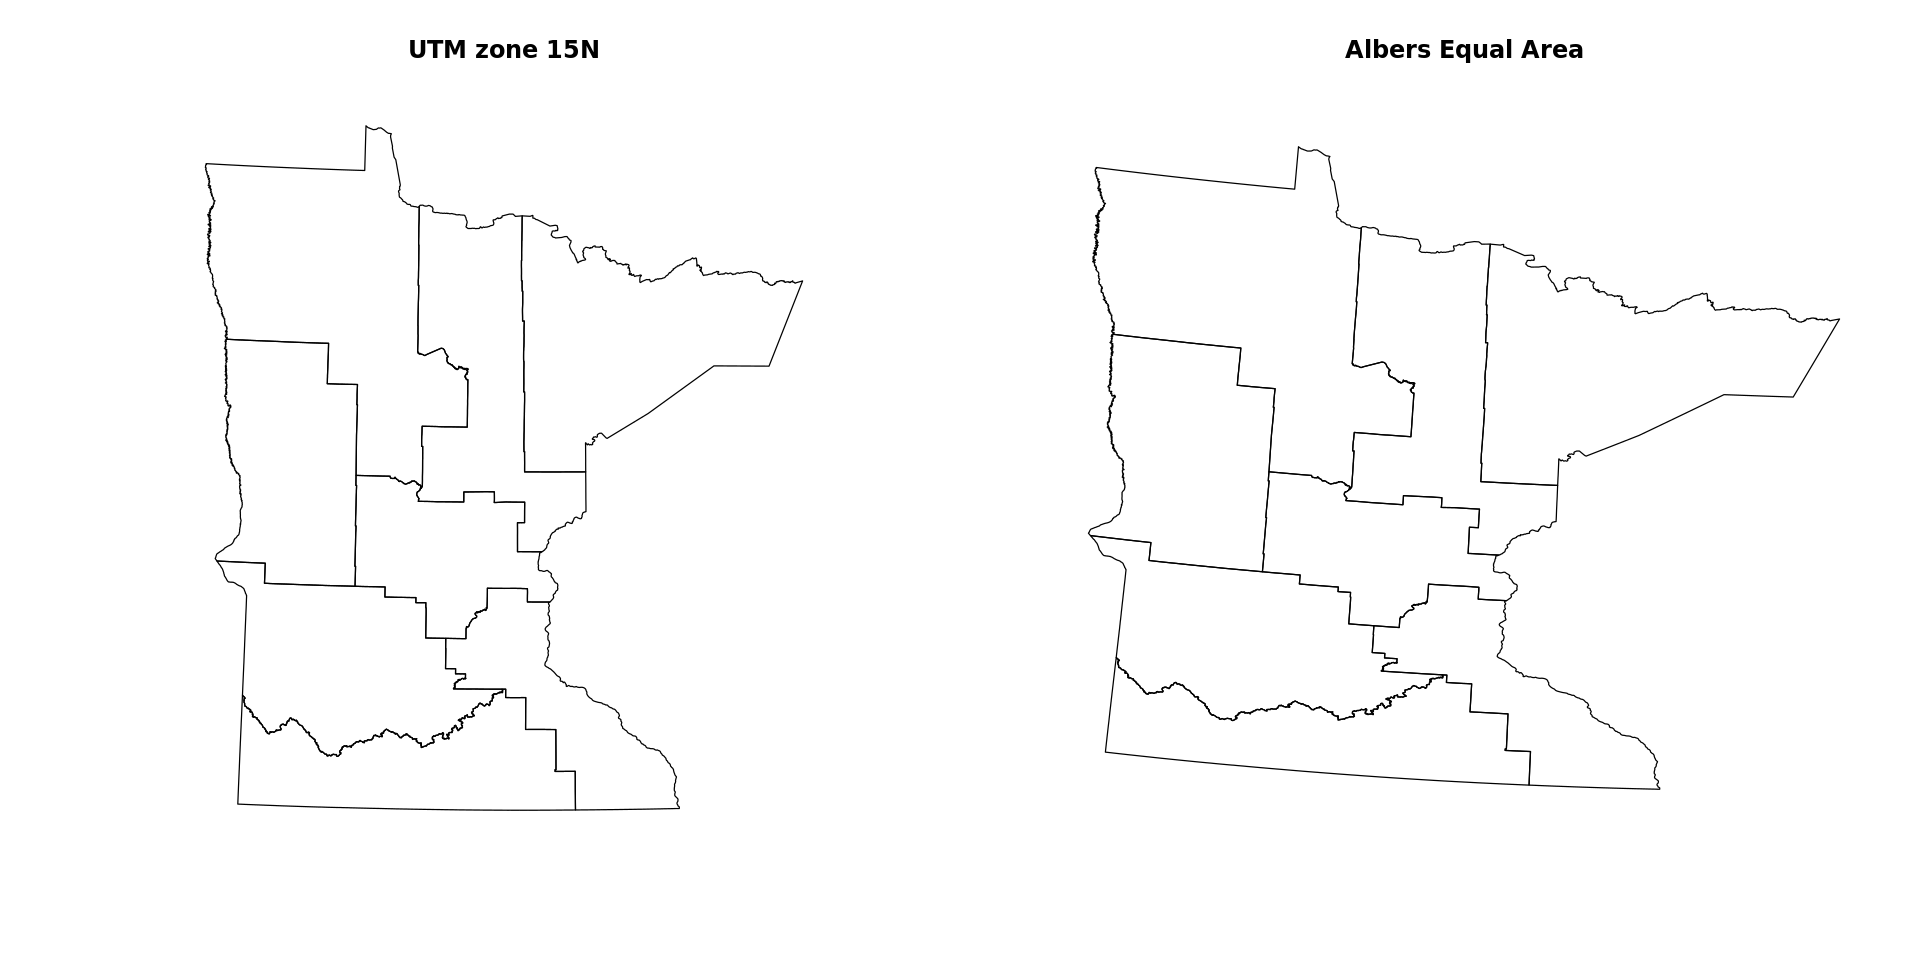

In [17]:
#transform crs
mn_sf_albers <- st_transform(mn_sf, crs = 9001) #coverting to albers equal area (epsg: 9001)

par(mfrow = c(1,2))
plot(mn_sf$geometry, main = "UTM zone 15N")
plot(mn_sf_albers$geometry, main = "Albers Equal Area")

<a id="Ex3"></a>
### **<span style='color:Green'> Exercise 3: Transform shapefile</span>**  


1. Using the [https://epsg.io/](https://epsg.io/) website, find the EPSG code associated with the Universal Transverse Mercator (UTM) zone relevant to Malawi.
2. Reproject your Malawi shapefile from Exercise 2 from WGS84 to the relevant UTM zone.
3. Double-check that your transformation was successful by
    1. Comparing the bbox extent of each `sf` object with the `st_bbox()` command (you should have lat/long units now, rather than meters)
    2. Comparing plots of each `sf` object
    3. Comparing the crs of each `sf` object with the `st_crs()` command
4. Why aren't the maps very different?



<details>
    
<summary><span style='color:Green'> Click to see answer  </span></summary>


```
mwi_sf_utm <- st_transform(mwi_sf, crs = 32736) #coverting to utm 36s (epsg: 32736)

st_bbox(mwi_sf)
st_bbox(mwi_sf_utm)

par(mfrow = c(1,2))
plot(mwi_sf$geometry, main = "WGS84")
plot(mwi_sf_utm$geometry, main = "UTM zone 36S")

#maps look equal, but checking that crs are not
st_crs(mwi_sf)
st_crs(mwi_sf_utm) 
```
----
          
</details>

---
<a id="EDA"></a>
## **<span style='color:Blue'>Exploratory Analysis</span>**

### Scatterplots

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



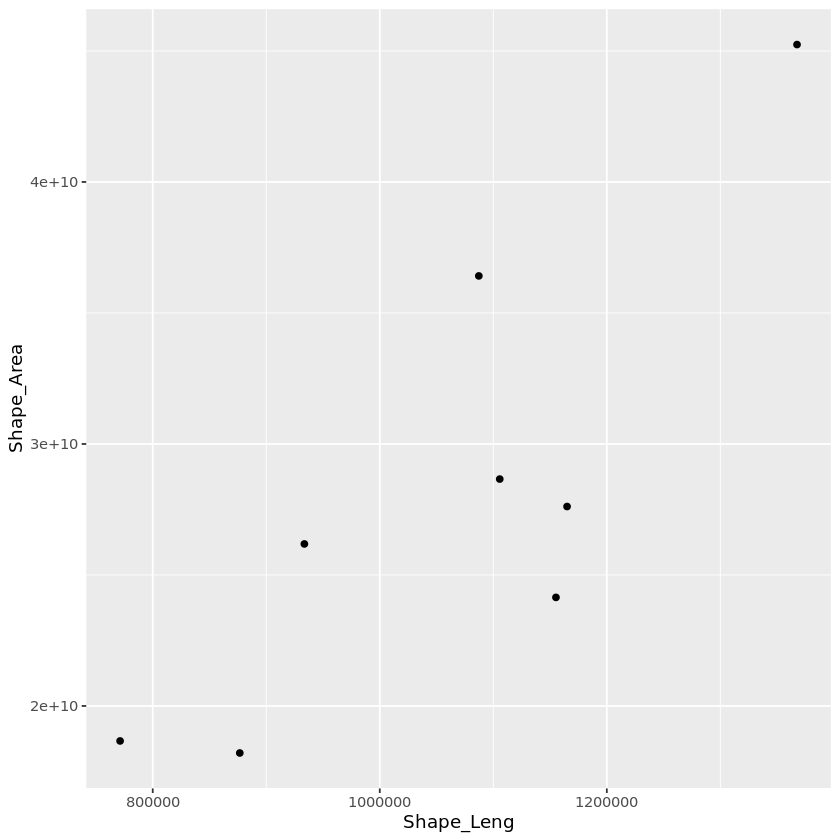

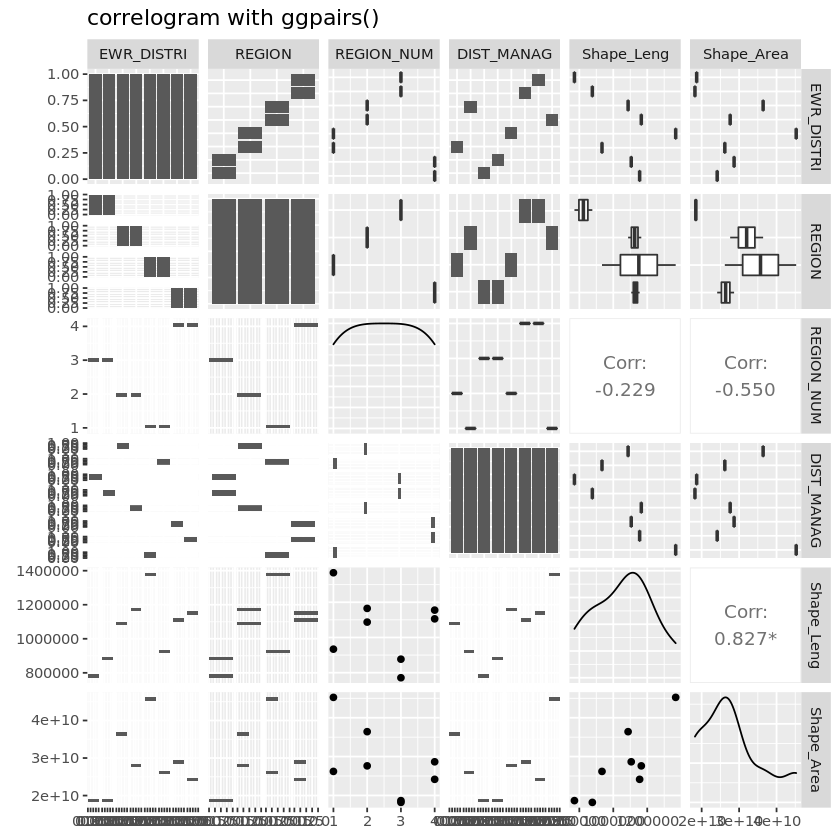

In [8]:
# var_int <- head(names(mn_sf), -1) #selected variable names, without geometry
# dat_int <- st_drop_geometry(mn_sf[, var_int, with = FALSE])   #remove geometry
dat_int <- st_drop_geometry(mn_sf)   #remove geometry

ggplot(data = dat_int, aes(x = Shape_Leng, y = Shape_Area)) + 
  geom_point()

ggpairs(dat_int, title="correlogram with ggpairs()") 


<a id="Ex4"></a>
### **<span style='color:Green'> Exercise 4: Scatterplot</span>**  

1. Extract the following variables of interest from your shapefile (don't forget to remove the geometry column).  
    `var_int <- c("ADM1_EN","croplnd","edu","female","income","livstck", "mktOrnI","mktOrnO","poverty","tobccHH")`
2. Plot a scatterplot of poverty against eduction.
3. Plot a scatterplot matrix of all of the variables of interest. Use the argument 
    `columns = 2:10` to just use the continuous variables and `ggplot2::aes(color=ADM1_EN)` 
    to color the points by Malawi regions (ADM1).
4. Do you see any patterns?


<details>
    
<summary><span style='color:Green'> Click to see answer  </span></summary>


```
var_mwi_int <- c("ADM1_EN","croplnd","edu","female","income","livstck",
            "mktOrnI","mktOrnO","poverty","tobccHH")
dat_mwi_int <- st_drop_geometry(mwi_sf[, c(var_mwi_int), with = FALSE])   #remove geometry

# Scatterplot of poverty against education
ggplot(data = dat_mwi_int, aes(x = poverty, y = edu, color = ADM1_EN)) + 
  geom_point()

# ggpairs: identify interesting relationships that could guide exploratory mapping

ggpairs(dat_mwi_int, columns = 2:10, ggplot2::aes(color=ADM1_EN), title="correlogram with ggpairs()") 
```
----
          
</details>

----

## **<span style='color:Blue'>References:</span>**
[Geocomputing with R](https://geocompr.robinlovelace.net/index.html)  
[Minnesota Geospatial Commons](https://gisdata.mn.gov/)